In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/ZIP/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
!cp -r "/content/leapgestrecog/leapGestRecog" '/content/drive/MyDrive/Data_deeplearning'

In [2]:
import os
a = "/content/drive/MyDrive/Data_deeplearning/leapGestRecog/09/01_palm"
path, dirs, files =next(os.walk(a))
f=len(files)
print(f)

200


In [3]:
!nvidia-smi

Wed Feb 28 10:11:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:

lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/00'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count]=j
        count +=1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [6]:
x_data = []
y_data = []
datacount = 0
for i in range(3,10):
    for j in os.listdir('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/0'+str(i)+'/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/0'+str(i)+'/'+j+'/'):
                img = Image.open('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/0'+str(i)+'/'+j+'/'+k).convert('L')
                img = img.resize((320,120))
                arr = np.array(img)
                x_data.append(arr)
                count +=1
            y_values = np.full((count,1),lookup[j])
            y_data.append(y_values)
            datacount += count
x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount,1)

In [ ]:
y_data.shape

(14000, 1)

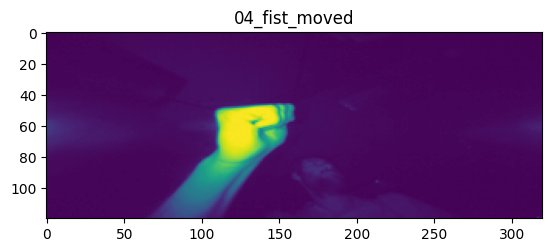

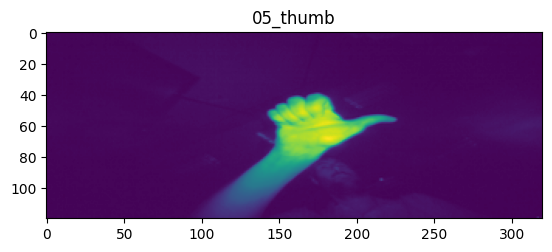

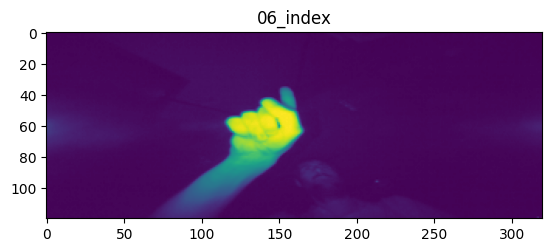

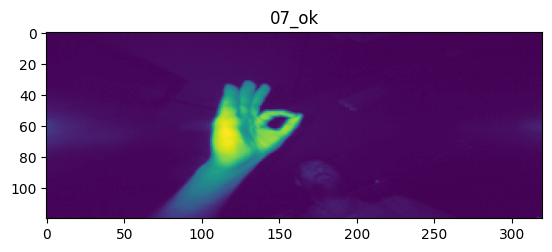

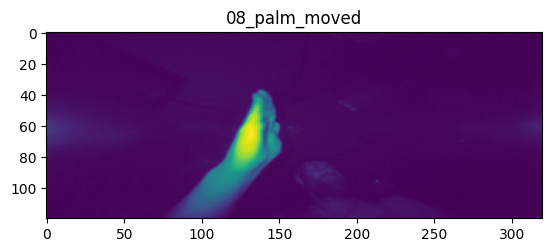

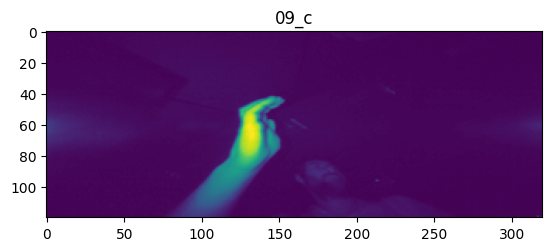

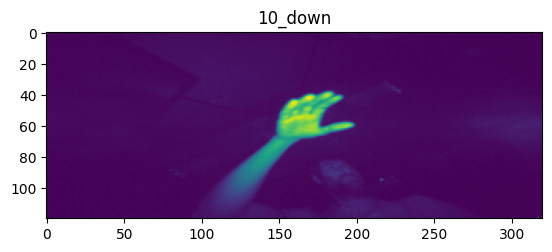

In [12]:
from random import randint
for i in range(3,10):
    plt.imshow(x_data[i*200,:,:])
    plt.title(reverselookup[y_data[i*200,0]])
    plt.show()

In [ ]:
y_data.shape

(14000, 1)

In [7]:

import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [8]:
x_data = x_data.reshape((datacount,120,320,1))
x_data/=255

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)

In [10]:
from keras import layers, models

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), strides=(2,2),activation='relu',input_shape=(120,320,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/3
175/175 [==============================] - 9s 23ms/step - loss: 0.4109 - accuracy: 0.8746 - val_loss: 0.0113 - val_accuracy: 0.9936
Epoch 2/3
175/175 [==============================] - 3s 20ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 3/3
175/175 [==============================] - 4s 20ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 9.7421e-04 - val_accuracy: 1.0000


In [13]:
print(x_train.shape,x_test.shape)

(11200, 120, 320, 1) (1400, 120, 320, 1)


In [14]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

44/44 [==============================] - 1s 8ms/step - loss: 0.0102 - accuracy: 0.9971
Accuracy:0.9971428513526917


In [15]:
model.predict(x_test)

44/44 [==============================] - 0s 5ms/step


array([[1.47018543e-11, 4.36645670e-16, 4.23347018e-07, ...,
        1.08151776e-13, 1.56815076e-05, 4.82784479e-09],
       [5.62851022e-14, 7.15843200e-25, 2.44580300e-10, ...,
        1.43785123e-11, 1.00000000e+00, 3.30828464e-12],
       [9.01864884e-16, 9.55961551e-26, 4.55188243e-08, ...,
        2.50547573e-25, 2.67361879e-11, 1.15119994e-14],
       ...,
       [3.53900896e-06, 1.15609543e-10, 9.61870080e-12, ...,
        9.99993801e-01, 6.10399176e-10, 8.61475835e-10],
       [1.76056976e-16, 2.31091598e-17, 2.31737096e-04, ...,
        4.55851541e-22, 3.49631506e-07, 7.26667526e-09],
       [1.59804608e-06, 9.99998450e-01, 2.41541187e-09, ...,
        4.19256730e-12, 5.19764336e-11, 6.48106369e-09]], dtype=float32)

In [16]:
y_pred = model.predict(x_test)

44/44 [==============================] - 0s 5ms/step


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_pred.round())

0.9971428571428571

In [ ]:
model.save("handmove.h5")